In [124]:
import pandas as pd
import seaborn as sns

In [125]:
path_to_file = '3_taxi_peru.csv'

In [126]:
taxi = pd.read_csv(path_to_file, sep=';')

In [127]:
# change data format
taxi['start_at'] = pd.to_datetime(taxi.start_at)
taxi['end_at'] = pd.to_datetime(taxi.end_at)
taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)

In [129]:
# save data only with asap and reserved statuses
taxi.query('start_type == "asap" or start_type == "reserved"').head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [130]:
# calculate waiting time
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [131]:
# find the driver who was late the most times
taxi.query('start_type == "reserved" and wait_time > 0.0') \
        .groupby('driver_id') \
        .agg({'wait_time': 'count'}) \
        .idxmax()

wait_time    406921adcca37705ef527b4246c0cfea
dtype: object

In [134]:
# add columns of month and day for orders
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

<AxesSubplot:xlabel='month', ylabel='count'>

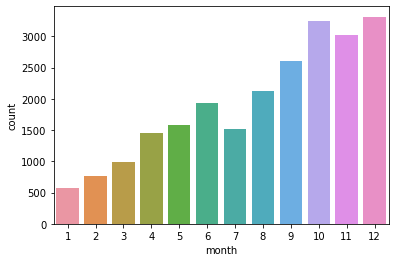

In [135]:
# plot distribution for number of orders depending on months 
sns.countplot(x="month", data=taxi)

<AxesSubplot:xlabel='weekday', ylabel='count'>

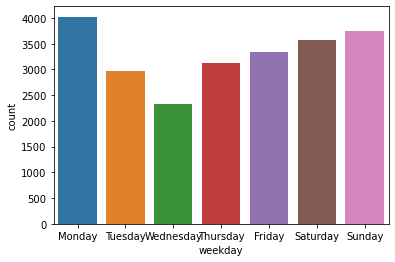

In [137]:
# plot distribution for number of orders depending on week days
sns.countplot(x='weekday', data=taxi, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<AxesSubplot:xlabel='month'>

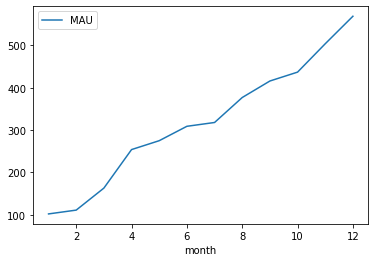

In [155]:
# calculaten and plot MAU (monthly active users) 
taxi.groupby('month') \
        .agg({'user_id': 'nunique'}) \
        .rename(columns={'user_id': 'MAU'}) \
        .plot.line()